<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1407/1542784937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")


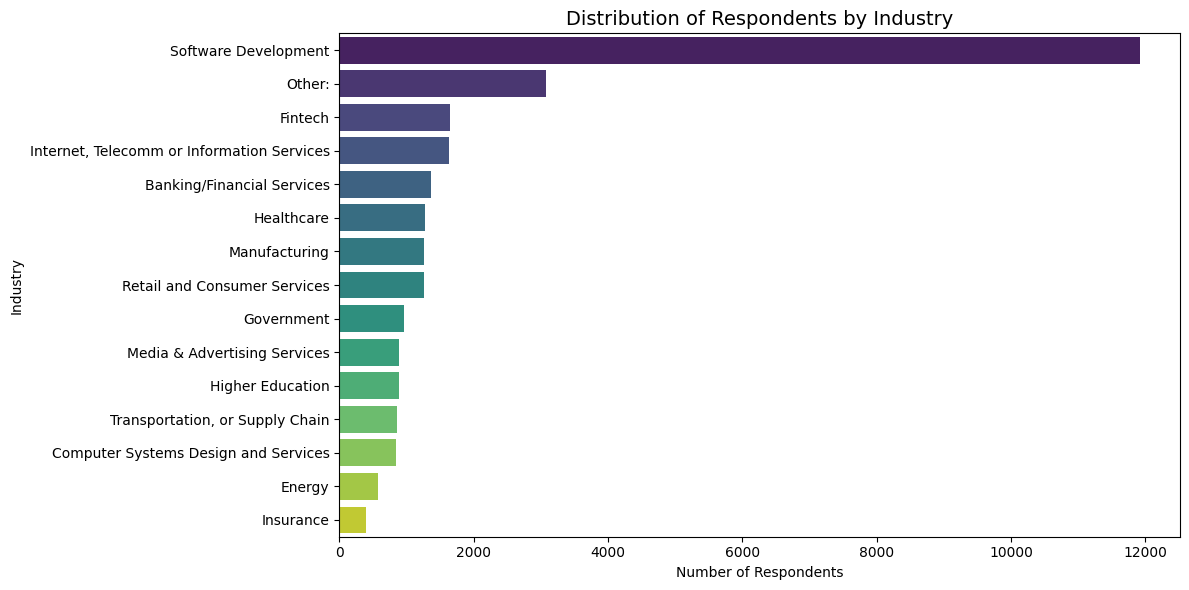

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Drop missing values in the Industry column
df_industry = df.dropna(subset=['Industry'])

# Count number of respondents per industry
industry_counts = df_industry['Industry'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")
plt.title('Distribution of Respondents by Industry', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
import pandas as pd

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Drop rows with missing compensation values
df_comp = df.dropna(subset=['ConvertedCompYearly'])

# Ensure compensation is numeric
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')

# Calculate basic statistics
mean_comp = df_comp['ConvertedCompYearly'].mean()
median_comp = df_comp['ConvertedCompYearly'].median()
std_comp = df_comp['ConvertedCompYearly'].std()

# Define outlier threshold: 3 standard deviations above mean
threshold = mean_comp + 3 * std_comp

# Identify outliers
outliers = df_comp[df_comp['ConvertedCompYearly'] > threshold]

# Display results
print(f"Mean: ${mean_comp:,.2f}")
print(f"Median: ${median_comp:,.2f}")
print(f"Standard Deviation: ${std_comp:,.2f}")
print(f"Outlier Threshold (Mean + 3*STD): ${threshold:,.2f}")
print(f"\nNumber of High Compensation Outliers: {outliers.shape[0]}")
outliers[['ConvertedCompYearly', 'Country', 'Employment', 'JobSat', 'EdLevel']].head()

Mean: $86,155.29
Median: $65,000.00
Standard Deviation: $186,756.97
Outlier Threshold (Mean + 3*STD): $646,426.21

Number of High Compensation Outliers: 89


/tmp/ipykernel_1407/1618436590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')


,ConvertedCompYearly,Country,Employment,JobSat,EdLevel
529,650000.0,United States of America,"Employed, full-time",6.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
828,1000000.0,United States of America,"Employed, full-time",8.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
1932,945000.0,United States of America,"Employed, full-time",2.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2171,750000.0,United States of America,"Employed, full-time",8.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2187,2000000.0,Gabon,"Employed, full-time",NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower Bound: $-80,177.25
Upper Bound: $220,860.75
Number of Outliers: 978


/tmp/ipykernel_1407/660636229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')


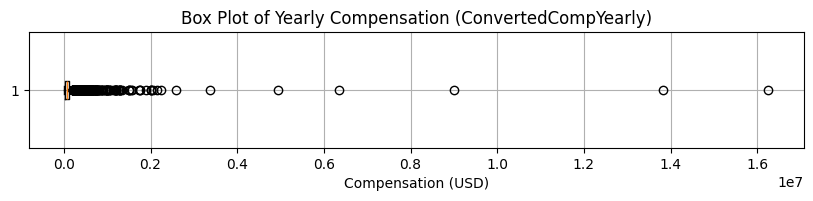

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Drop missing values in compensation column
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Convert to numeric (if needed)
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')

# Calculate IQR
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_clean[(df_clean['ConvertedCompYearly'] < lower_bound) | 
                    (df_clean['ConvertedCompYearly'] > upper_bound)]

# Output statistics
print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower Bound: ${lower_bound:,.2f}")
print(f"Upper Bound: ${upper_bound:,.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")

# Box plot visualization
plt.figure(figsize=(10, 1.5))
plt.boxplot(df_clean['ConvertedCompYearly'], vert=False)
plt.title("Box Plot of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Compensation (USD)")
plt.grid(True)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [ ]:
##Write your code here

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
